In [52]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

In [53]:
def sis_exp_merc():
    url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativaMercadoMensais?$top=100&$filter=Indicador%20eq%20'IPCA'&$format=json&$select=Indicador,Data,DataReferencia,Media,baseCalculo"
    df = pd.read_json(url)
    df = pd.json_normalize(df['value'])
    df = df[(df['Data'] == max(df.Data)) & (df['baseCalculo'] == 0)]
    df = df[['Indicador', 'Data', 'DataReferencia', 'Media']]
    return df

In [54]:
df=sis_exp_merc()
lista=[]
for row in range(len(df)):
    lista.append(datetime.strptime(df.iloc[row]['DataReferencia'], '%m/%Y'))
df['DataReferencia']=lista
df

,Indicador,Data,DataReferencia,Media
1,IPCA,2022-09-30,2024-09-01,0.2454
3,IPCA,2022-09-30,2024-08-01,0.1703
5,IPCA,2022-09-30,2024-07-01,0.1880
7,IPCA,2022-09-30,2024-06-01,0.2154
9,IPCA,2022-09-30,2024-05-01,0.2455
11,IPCA,2022-09-30,2024-04-01,0.3155
13,IPCA,2022-09-30,2024-03-01,0.3289
15,IPCA,2022-09-30,2024-02-01,0.4224
17,IPCA,2022-09-30,2024-01-01,0.4103
19,IPCA,2022-09-30,2023-12-01,0.5221


In [57]:
ddff=pd.DataFrame(pd.date_range(min(df.DataReferencia), max(df.DataReferencia)).to_pydatetime(),columns=['DataReferencia'])
ddff=ddff[ddff['DataReferencia'].dt.strftime('%d') != '01']
ddff['Indicador']=df['Indicador'][1]
ddff['Data']=df['Data'][1]
ddff['Media']=np.nan

In [58]:
df=pd.concat([df,ddff]) ##NÃO RODAR MAIS DE 1x
df=df.sort_values(by=['DataReferencia'])

In [60]:
df.Media
df.Media.interpolate()
df['Media']=df.Media.interpolate()
df

,Indicador,Data,DataReferencia,Media
49,IPCA,2022-09-30,2022-09-01,-0.179000
1,IPCA,2022-09-30,2022-09-02,-0.161550
2,IPCA,2022-09-30,2022-09-03,-0.144100
3,IPCA,2022-09-30,2022-09-04,-0.126650
4,IPCA,2022-09-30,2022-09-05,-0.109200
...,...,...,...,...
727,IPCA,2022-09-30,2024-08-28,0.235710
728,IPCA,2022-09-30,2024-08-29,0.238132
729,IPCA,2022-09-30,2024-08-30,0.240555
730,IPCA,2022-09-30,2024-08-31,0.242977


In [61]:
dtDRf = df['DataReferencia']
dfMed = df['Media']

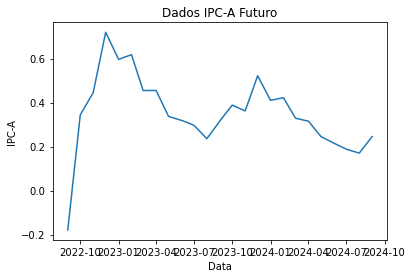

In [62]:
plt.xlabel('Data')
plt.ylabel('IPC-A')
plt.title('Dados IPC-A Futuro')
plt.plot(dtDRf, dfMed)
plt.show()